## РК №1 ТМО
### Васькин М.И. ИУ5-62Б
### Вариант №4

### Задача №1:
**Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.**
### Дополнительно для ИУ5-62Б:
**Для произвольной колонки данных построить гистограмму.**

In [14]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Датасет - данные о болезнях сердца
data = pd.read_csv('heart.csv', sep=",")

In [16]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Расшифровка полей:\
age\
sex\
chest pain type (4 values)\
resting blood pressure\
serum cholestoral in mg/dl\
fasting blood sugar > 120 mg/dl\
resting electrocardiographic results (values 0,1,2)\
maximum heart rate achieved\
exercise induced angina\
oldpeak = ST depression induced by exercise relative to rest the slope of the peak exercise ST segment\
number of major vessels (0-3) colored by flourosopy\
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [17]:
data.shape

(1025, 14)


Целевым признаком будет наличие сердечных заболеваний у пациента (поле "target")

Проверка типов данных и наличие пропусков:


In [18]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [19]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Пропусков нет

#### Корреляционный анализ
Создадим корреляционную матрицу, используя коэффициент Пирсона

<Axes: >

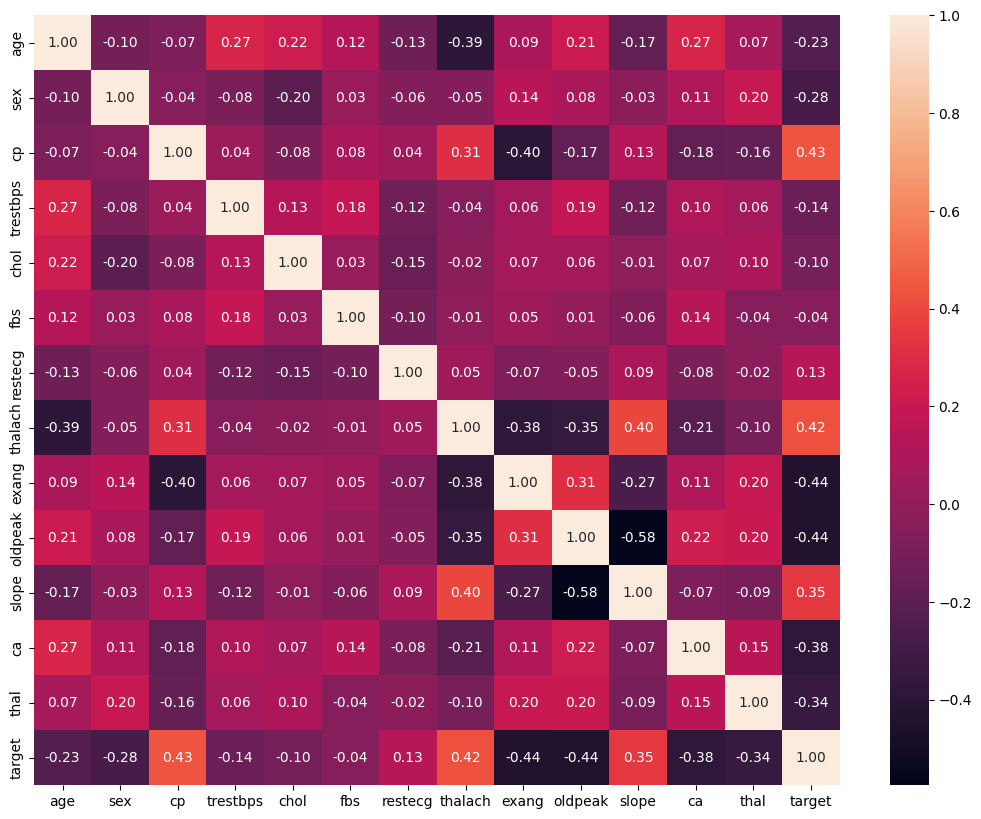

In [20]:
fig, ax = plt.subplots(1,1, figsize=(13,10))
sns.heatmap(data.corr("pearson"), annot=True, fmt=".2f")

На основе корреляционной матрицы можно сделать следующие выводы.

Все признаки слабо коррелируют с целевым признаком target. Наиболее сильно коррелируют с целевым признаком поля cp, thalach и slope.

Следовательно для обучения модели лучше выбрать поля cp, thalach и slope.


#### Гистограмма артериального давления в покое

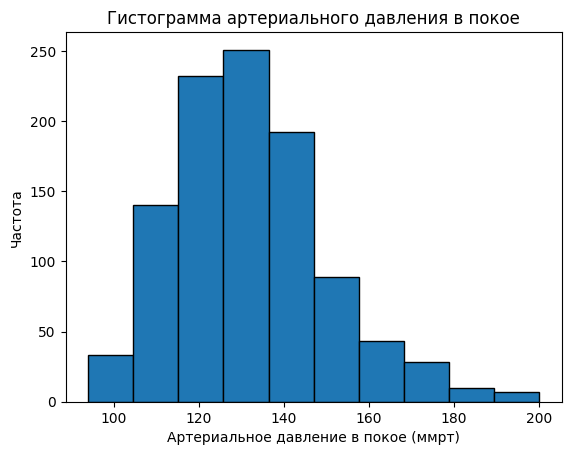

In [26]:
plt.hist(data['trestbps'], edgecolor='black')
plt.title('Гистограмма артериального давления в покое')
plt.xlabel('Артериальное давление в покое (ммрт)')
plt.ylabel('Частота')
plt.show()